In [82]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set(style='white',palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [83]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.metrics import silhouette_score,r2_score,mean_squared_error,confusion_matrix,accuracy_score 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [84]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
data.duplicated().sum()
data.drop_duplicates(keep='first',subset=None, ignore_index=False,inplace=True)
data.duplicated().sum()

0

In [87]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [88]:
le = LabelEncoder()

orig_sex_val = data.sex 

In [89]:
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)

In [90]:
le_sex_val = data.sex

In [91]:
orig_dic_sex = np.unique(orig_sex_val)
le_dic_sex = np.unique(le_sex_val)
sex_dict = dict(zip(orig_dic_sex,le_dic_sex))
sex_dict

{'female': 0, 'male': 1}

In [92]:
data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<AxesSubplot:title={'center':'Correlation Matrix'}>

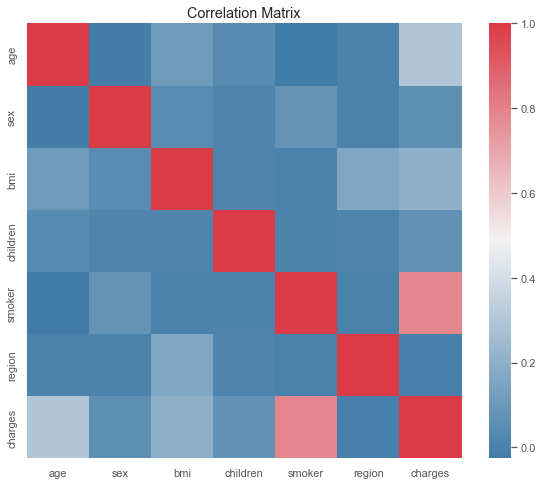

In [93]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True, ax=ax)

Text(0.5, 1.0, 'Female Charges Distribution')

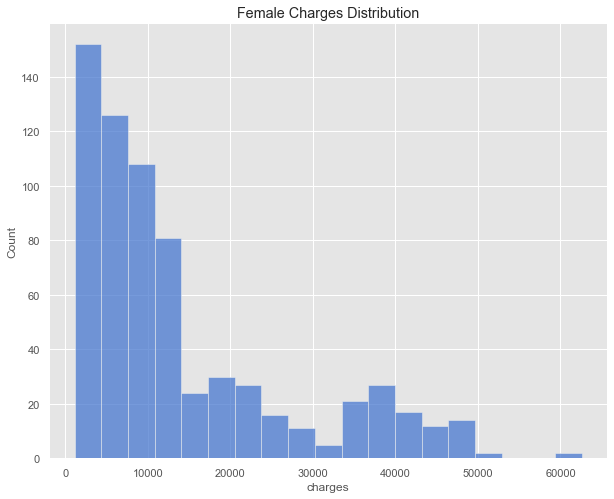

In [94]:
f,ax = plt.subplots(figsize=(10,8))

sns.histplot(data[(data.sex ==1)]['charges'],color='b',ax=ax)
ax.set_title('Female Charges Distribution')

In [95]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [96]:
scaler = StandardScaler()
x = data.drop(columns=['charges'],axis=1)
y = data.charges

# x = scaler.fit_transform(x)
x = pd.DataFrame(scaler.fit_transform(x)).round(3)
# y = scaler.fit_transform(np.array(y).reshape(-1,1))
y = pd.DataFrame(scaler.fit_transform(np.array(y).reshape(-1,1))).round(3)
x

,0,1,2,3,4,5
0,-1.440,-1.01,-0.453,-0.909,1.970,1.343
1,-1.512,0.99,0.509,-0.079,-0.508,0.438
2,-0.799,0.99,0.383,1.580,-0.508,0.438
3,-0.443,0.99,-1.305,-0.909,-0.508,-0.467
4,-0.514,0.99,-0.292,-0.909,-0.508,-0.467
...,...,...,...,...,...,...
1332,0.768,0.99,0.050,1.580,-0.508,-0.467
1333,-1.512,-1.01,0.206,-0.909,-0.508,-1.372
1334,-1.512,-1.01,1.014,-0.909,-0.508,0.438
1335,-1.298,-1.01,-0.798,-0.909,-0.508,1.343


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [98]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_test,y_pred)

scr_mse = mean_squared_error(y_test,y_pred)

mod_perf = pd.DataFrame( 
    [ 
        'LinearRegression', scr_r2,scr_mse
    ]
).transpose()

mod_perf.columns = ['Method', 'Test R2 Score', 'Test MSE score']

mod_perf

,Method,Test R2 Score,Test MSE score
0,LinearRegression,0.772454,0.265692


In [100]:
ranfor = RandomForestRegressor(n_estimators=100, n_jobs=-1,criterion='squared_error',random_state=42)

ranfor.fit(x_train,y_train)


y_pred = ranfor.predict(x_test)

ran_mse = mean_squared_error(y_test,y_pred)

perf_mod = pd.DataFrame([ 
    'RandomForestRegressor', ran_mse
]).transpose()

perf_mod.columns = ['Method', 'MSE RANFOR SCOR']
perf_mod

C:\Users\amunv\AppData\Local\Temp\ipykernel_19204\2244751029.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(x_train,y_train)


,Method,MSE RANFOR SCOR
0,RandomForestRegressor,0.159183
